<a href="https://colab.research.google.com/github/ifeomamegwai/Le-Wagon-python-and-ML/blob/main/Python_for_AI_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset("tips")

print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


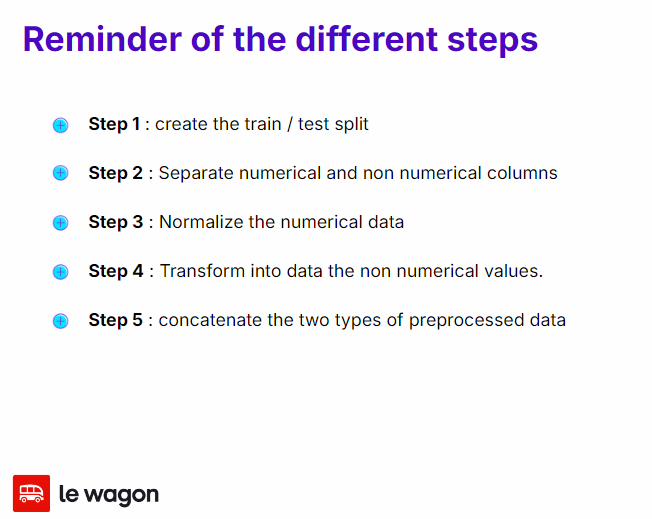

#1. Feature and Target selection (selecting X and y)

In [ ]:
X = df.drop(columns='tip')
X

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3
240,27.18,Female,Yes,Sat,Dinner,2
241,22.67,Male,Yes,Sat,Dinner,2
242,17.82,Male,No,Sat,Dinner,2


In [ ]:
y = df['tip']
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


#2. Preprocessing

##2a Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

##2b Splitting the features into numerical and non-numerical

In [ ]:
X_train_numerical = X_train.select_dtypes(include="number")
X_train_non_numerical = X_train.select_dtypes(exclude="number")

In [ ]:
X_test_numerical = X_test.select_dtypes(include="number")
X_test_non_numerical = X_test.select_dtypes(exclude="number")

In [ ]:
X_train_numerical

,total_bill,size
127,14.52,2
103,22.42,2
155,29.85,5
186,20.90,3
208,24.27,2
...,...,...
121,13.42,2
202,13.00,2
89,21.16,2
213,13.27,2


In [ ]:
X_train_non_numerical

,sex,smoker,day,time
127,Female,No,Thur,Lunch
103,Female,Yes,Sat,Dinner
155,Female,No,Sun,Dinner
186,Female,Yes,Sun,Dinner
208,Male,Yes,Sat,Dinner
...,...,...,...,...
121,Female,No,Thur,Lunch
202,Female,Yes,Thur,Lunch
89,Male,No,Thur,Lunch
213,Female,Yes,Sat,Dinner


##2c Processing numerical features (normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

standard_scaler = MinMaxScaler().set_output(transform="pandas")
X_train_numerical_scaled = standard_scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = standard_scaler.transform(X_test_numerical)

In [ ]:
X_test_numerical_scaled

,total_bill,size
222,0.115417,0.0
149,0.093004,0.2
209,0.202974,0.2
134,0.318182,0.2
13,0.321743,0.6
88,0.453289,0.2
8,0.250733,0.2
19,0.368245,0.4
99,0.196690,0.2
59,0.946795,0.6


<Axes: xlabel='total_bill', ylabel='Count'>

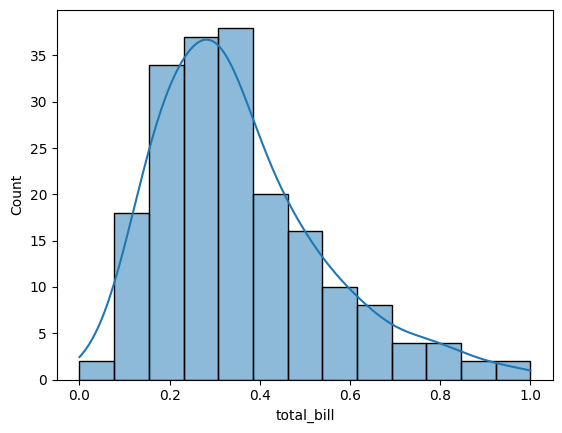

In [ ]:
sns.histplot(X_train_numerical_scaled['total_bill'], kde=True)

<Axes: xlabel='size', ylabel='Count'>

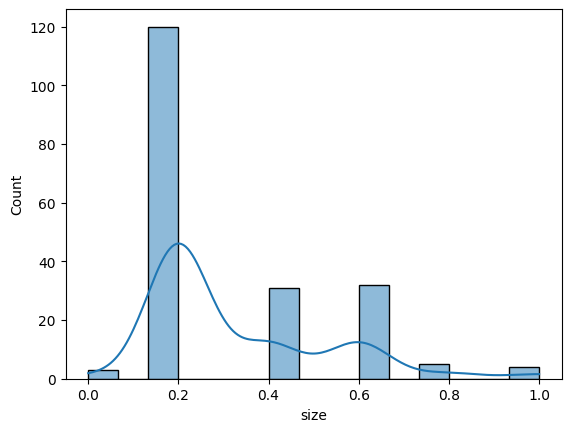

In [ ]:
sns.histplot(X_train_numerical_scaled['size'], kde=True)

##2d Processing non-numerical features (one-hot encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
X_train_non_numerical_encoded = ohe.fit_transform(X_train_non_numerical)
X_test_non_numerical_encoded = ohe.transform(X_test_non_numerical)

In [ ]:
X_test_non_numerical_encoded

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
222,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
149,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
209,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
134,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
13,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
88,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
59,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


##2e Processing non-numerical targets (label encoding)

##2f Concatenate numerical and non numerical values

In [ ]:
X_train_processed = X_train_numerical_scaled.join(X_train_non_numerical_encoded, how='inner')
X_train_processed

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
127,0.239841,0.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
103,0.405320,0.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
155,0.560955,0.8,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
186,0.373481,0.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
208,0.444072,0.2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.216799,0.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
202,0.208002,0.2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
89,0.378928,0.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
213,0.213657,0.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_test_processed = X_test_numerical_scaled.join(X_test_non_numerical_encoded, how='inner')
X_test_processed

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
222,0.115417,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
149,0.093004,0.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
209,0.202974,0.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
134,0.318182,0.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
13,0.321743,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
88,0.453289,0.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.250733,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19,0.368245,0.4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99,0.196690,0.2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
59,0.946795,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#3. Modelling

##3a - Import and instantiate the model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

##3b - Fit to training data

In [ ]:
model.fit(X_train_processed, y_train)

LinearRegression()

##3c - Evaluate

In [ ]:
X_test_processed.shape

(49, 12)

In [ ]:
y_test.shape

(49,)

In [ ]:
model.score(X_test_processed, y_test)

0.5982116360976955

##3d - Predict

In [ ]:
y_predictions = model.predict(X_test_processed)

In [ ]:
y_test

,tip
222,1.92
149,2.00
209,2.23
134,3.25
13,3.00
88,5.85
8,1.96
19,3.35
99,1.50
59,6.73


In [ ]:
y_predictions

array([1.84752775, 1.80751367, 2.24834018, 2.66152773, 3.21560074,
       3.21541747, 2.50410927, 3.0374646 , 2.49535214, 5.5152979 ,
       1.99087922, 3.56857666, 2.75457454, 4.25409574, 2.70219806,
       2.66806762, 3.20978458, 3.0926458 , 2.11366153, 2.27612798,
       2.42471004, 3.94641414, 3.62037421, 1.85034594, 2.36021361,
       2.5579086 , 2.59686238, 2.09836621, 2.53521412, 2.482827  ,
       5.52020919, 3.90735701, 2.55953507, 4.53045772, 2.52392336,
       2.48708867, 3.31635651, 2.40342777, 2.39828097, 2.13880102,
       4.30263344, 3.31171295, 2.30929467, 2.47820547, 2.45843946,
       2.24406788, 3.49709518, 2.55979261, 2.82342959])